In [41]:
!which python

/Users/luchinsky/Work/STUDY/Thesis/tdavec_library/tdavec_python/env/bin/python


In [1]:
from tdavec import createEllipse, TDAvectorizer, tdavec_core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Hello from tdavec


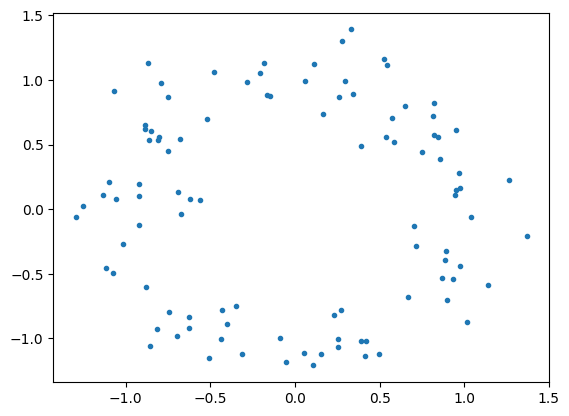

In [2]:
X = pd.read_csv("../tdavec/unitCircle.csv").to_numpy()
plt.plot(X[:,0], X[:,1], ".")
plt.show()

In [3]:
v = TDAvectorizer()
v.fit([X])
PD = v.diags[0]
# PD[0] = np.vstack([PD[0], [0,2]])

In [5]:
len(v.vectorization_names)

14

In [4]:
def lists_are_equal(nums1, nums2, atol=1e-6):
    return np.allclose(nums1, nums2, atol=atol)


## Comparing presistentce

In [46]:
scaleSeq = np.linspace(0, 2, 11)
PL_0 = tdavec_core.computePersistenceLandscape(PD, homDim=0, scaleSeq=scaleSeq)
R = np.array([
 0, 0.2, 0.4, 0.6, 0.8, 1, 0.8, 0.6, 0.4, 0.2, 0 
])
lists_are_equal(PL_0, R)

True

## computeStats

In [29]:
python = tdavec_core.computeStats(PD, 0)
python_ = np.array(list(python.values()))
R = np.array([
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16248263120126, 0.200405579272617, 0.128677543119415, 0.101342578312333, 1.97958915964958, 0.0558823641308021, 0.0927648248476049, 0.194107403159938, 0.254139908573134, 0.08124131560063, 0.100202789636309, 0.0643387715597074, 0.0506712891561665, 0.989794579824788, 0.027941182065401, 0.0463824124238025, 0.0970537015799689, 0.127069954286567, 0.16248263120126, 0.200405579272617, 0.128677543119415, 0.101342578312333, 1.97958915964958, 0.0558823641308021, 0.0927648248476049, 0.194107403159938, 0.254139908573134, 100, 6.17561341836067 
])
print(f"[R] = {len(R)}, [python_={len(python_)}")

lists_are_equal(python_, R, atol=1e-2)

[R] = 38, [python_=38


True

In [33]:
python = tdavec_core.computeStats(PD, 1)
python_ = np.array(list(python.values()))
R = np.array([
 0.293132394867891, 0.0850074464279819, 0.284394883135768, 0.0960806397014151, 0.299475758370877, 0.177939739281458, 0.243058614290154, 0.339139253991569, 0.416317366530457, 0.385940496272333, 0.274479552229507, 0.318265198439214, 0.0858363430062821, 1.08001988780266, 0.219598212239333, 0.274776307571496, 0.360612650577778, 0.621524153485136, 0.339536445570112, 0.166753538148609, 0.300849142069845, 0.0989110953405682, 0.671168066985808, 0.205614756755523, 0.251229324745392, 0.35014042008596, 0.530068613668374, 0.0928081014044422, 0.232171512335849, 0.0243028776000064, 0.0419179560542314, 0.858642745724079, 0.00454985253744056, 0.00704404031930657, 0.048961996373538, 0.247699551273886, 13, 1.7286342654852 
])
print(f"[R] = {len(R)}, [python_={len(python_)}")

lists_are_equal(python_, R, atol=1e-2)

[R] = 38, [python_=38


False

In [34]:
python_/R

array([1.00000001, 1.00000001, 1.00000002, 0.85106559, 1.        ,
       1.06331089, 1.05507836, 0.99728005, 0.94997164, 1.00000001,
       0.99999997, 1.        , 0.77878133, 0.99999998, 1.06278517,
       1.02019402, 0.96273075, 0.72059648, 1.00000001, 0.99999999,
       0.99999999, 0.88212421, 0.99999999, 1.06339333, 1.0241155 ,
       0.98400441, 0.82186976, 1.        , 0.99999995, 1.0000003 ,
       0.83818711, 0.99999998, 1.17707923, 1.06301957, 0.87053319,
       0.36023476, 1.        , 1.00000007])

## ComplexPolymomial

In [47]:
python = tdavec_core.computeComplexPolynomial(PD, 0)
R = np.array([
 0, -16.248263120126 
])
lists_are_equal(python, R)

True

In [55]:
v.setParams({"output":"poly"})
v.transform(homDim=1)

array([[[-3.81072117, -5.01722649]]])

In [40]:
v.diags

[]

In [37]:
python = tdavec_core.computeComplexPolynomial(PD, 1)
R = np.array([
 -3.81072113328258, -5.01722645154033 
])
lists_are_equal(python, R)

True

## Algebra

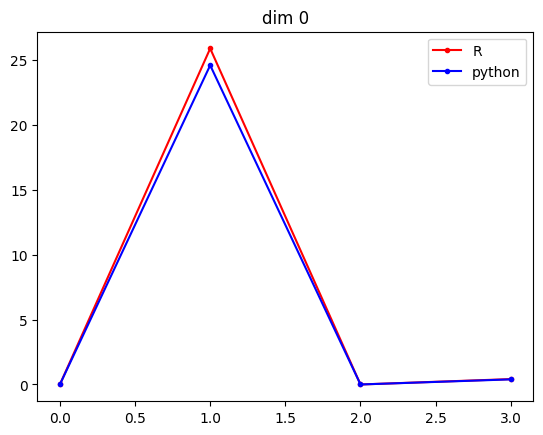

In [57]:
v.setParams({"output":"algebra"})
python = v.transform(homDim=0)[0]
R = np.array([0,25.8803884718878,0,0.414197953470299])
plt.plot(R, "r.-", label = "R")
plt.plot(0.95*python, "b.-", label = "python")
plt.title("dim 0")
plt.legend()
plt.show()

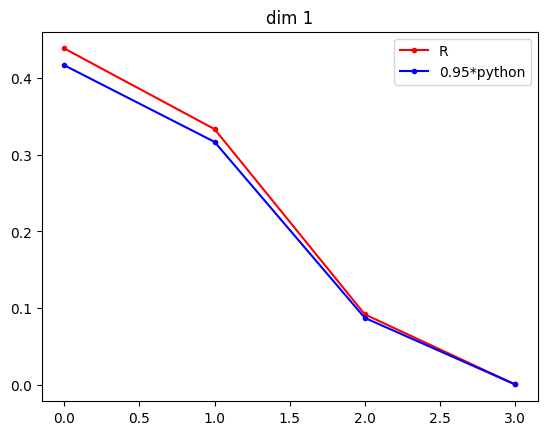

In [58]:
v.setParams({"output":"algebra"})
python = v.transform(homDim=1)[0]
R = np.array([0.438920678383275,0.333573729178711,0.0915972597177655,0.000100476536448101])
plt.plot(R, "r.-", label = "R")
plt.plot(0.95*python, "b.-", label = "0.95*python")
plt.title("dim 1")
plt.legend()
plt.show()

## computeTropicalCoordinates 

In [5]:
python = tdavec_core.computeTropicalCoordinates(PD, 0)
python

array([ 2.        ,  2.3628912 ,  2.68205181,  2.98638484, 16.24826308,
        0.        ,  0.        ])

In [6]:
R = np.array([
 2, 2.36289119595766, 2.68205181705815, 2.98638484543615, 16.248263120126, 0, 183.751736879874 
])
lists_are_equal(python[:-1], R[:-1])

True

In [7]:
python = tdavec_core.computeTropicalCoordinates(PD, 1)
R = np.array([
 0.860326686071788, 0.954869453646198, 1.02284830582612, 1.0654713502642, 1.20650531825775, 0.755064096276033, 14.5381885375704 
])
lists_are_equal(python[:-1], R[:-1])

True

In [ ]:
pythib

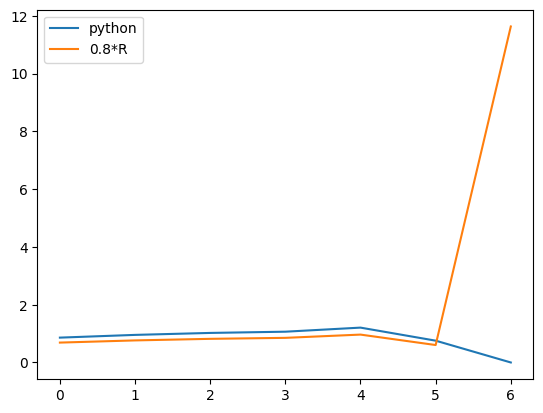

In [78]:
plt.plot(python, label = "python")
plt.plot(0.8*R, label = "0.8*R")
# plt.ylim(0, 20)
plt.legend()
plt.show()

In [64]:
python/R

/var/folders/xm/m7dhzrs55vd_trclqx_r8zcr0000gn/T/ipykernel_84451/3917348062.py:1: RuntimeWarning: invalid value encountered in divide
  python/R


array([ 1.,  1.,  1.,  1.,  1., nan,  0.])

In [62]:
np.array(list(python.values()))

array([ 2.        ,  2.3628912 ,  2.68205181,  2.98638484, 16.24826308,
        0.        ,  0.        ])

## computeTemplateFunction

In [10]:
python = tdavec_core.computeTemplateFunction(PD, homDim = 0)
python
R = np.array([
 47.7068836896669, 27.5322316257831, 9.10973719256688, 0.620518170581516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0999999999999992, 0.900000000000002 
])
lists_are_equal(python, R)

True

In [11]:
python = tdavec_core.computeTemplateFunction(PD, homDim = 1)
R = np.array([
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.468406748165331, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.75451666854592, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.13899057979361, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.365103088717902, 0, 0, 0, 0, 0, 0, 0.496733139282122, 0.503266860717878, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0355717802395706, 0, 0, 0, 0, 0, 0, 0.0888546409007165, 0.0888546409007165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 
])
lists_are_equal(python, R)

True